# Logistic Regression

## Exercise 2

### Introduction

In this exercice you will be in charge of helping an **High School**, you will have to find ways to help their students **pass classes**. <br>
To do so you will be using a dataset they *created*.<br>
The data attributes include student grades, demographic, social and school related features and it was collected by using *school reports and questionnaires*.


**Dataset:** "student-mat.csv"<br>

**Columns:** <br>
1 **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>
2 **sex** - student's sex (binary: 'F' - female or 'M' - male)<br>
3 **age** - student's age (numeric: from 15 to 22)<br>
4 **address** - student's home address type (binary: 'U' - urban or 'R' - rural)<br>
5 **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)<br>
6 **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)<br>
7 **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)<br>
8 **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)<br>
9 **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
10 **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
11 **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')<br>
12 **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')<br>
13 **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
14 **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
15 **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)<br>
16 **schoolsup** - extra educational support (binary: yes or no)<br>
17 **famsup** - family educational support (binary: yes or no)<br>
18 **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>
19 **activities** - extra-curricular activities (binary: yes or no)<br>
20 **nursery** - attended nursery school (binary: yes or no)<br>
21 **higher** - wants to take higher education (binary: yes or no)<br>
22 **internet** - Internet access at home (binary: yes or no)<br>
23 **romantic** - with a romantic relationship (binary: yes or no)<br>
24 **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>
25 **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)<br>
26 **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)<br>
27 **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
28 **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
29 **health** - current health status (numeric: from 1 - very bad to 5 - very good)<br>
30 **absences** - number of school absences (numeric: from 0 to 93)<br>
31 **G1** - first period grade (numeric: from 0 to 20)<br>
31 **G2** - second period grade (numeric: from 0 to 20)<br>
32 **G3** - final grade (numeric: from 0 to 20, output target)<br>

### Questions

1. What are the most relevant factors in the final grade?
2. What recommandations should the school give to the students?
3. What actions can the school take?

### Exercise Layout

1. Data exploration.
2. Create a model that will predict if a student pass or not.
3. Create a test dataset that will represents the students after the school take action.
4. Show the improvements that have been made with these changes.
5. Recomand differents approches the school could choose.

### Ressources

**Dataset**

[https://archive.ics.uci.edu/ml/datasets/Student+Performance](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Papers**

[P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.](http://www3.dsi.uminho.pt/pcortez/student.pdf)

## 1/ Data Exploration

First we need to take a look at our data to make sure we don't have any **missing values**.<br>
Then we will start with an **heatmap of correlation** between features.

In [1]:
# The usual imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Dataset import
df = pd.read_csv('student-mat.csv', sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [4]:
df.isnull().values.any()

False

### a/ Data conversion

After a quick look at the dataframe we can see that we **don't** have any **missing or null** value.<br>
But we have a lot of **non numerical** data that we will need to **convert** to numerical value or get rid of.

We have **17 columns** with non numerical value.<br>
We can start by converting the binary one like sex, address, schoolsup...<br>

Then we will have only **4 nominal** variable to deal with Mjob, Fjob, reason and guardian.

Before we start transforming these variable let's just take a look at these variables and make **4 violin plot**.

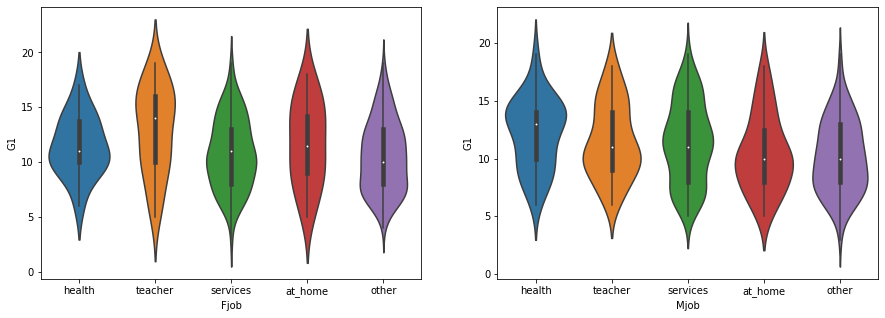

In [5]:
fig, ax = plt.subplots(1,2, figsize=[15, 5])
sns.violinplot(x="Fjob", y="G1", data=df, order=["health", "teacher", "services", "at_home", "other"], ax=ax[0])
sns.violinplot(x="Mjob", y="G1", data=df, order=["health", "teacher", "services", "at_home", "other"], ax=ax[1])

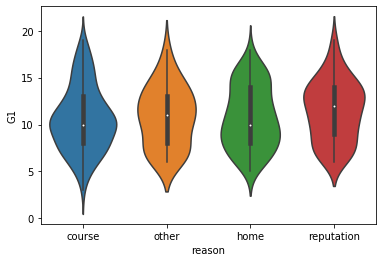

In [6]:
sns.violinplot(x="reason", y="G1", data=df)

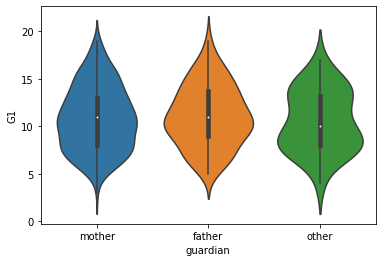

In [7]:
sns.violinplot(x="guardian", y="G1", data=df)

### Dataset transformation process

1. Create a clean-up dictionary for the binary attributes. [[ Hint ]](https://pbpython.com/categorical-encoding.html#approach-1-find-and-replace)
2. Convert the non binary columns to new binary columns. [[ Hint ]](https://pbpython.com/categorical-encoding.html#scikit-learn)

In [8]:
# 1. Create a clean-up dictionary for the binary attributes

# Rename binary attribute ex: (sex => male, address => urban, ...)
df.rename(
    columns={
        'school': 'GPschool',
        'sex': 'male',
        'address': 'urban',
        'famsize': 'largefam',
        'Pstatus': 'Ptogether'
    },
    inplace=True
)

# Create mapping dictionnary to replace the binary attribute value
cleanup_binaries = {
    "GPschool": {"GP": 0, "MS": 1},
    "male": {"F": 0, "M": 1},
    "urban": {"U": 1, "R": 0},
    "largefam": {"LE3": 0, "GT3": 1},
    "Ptogether": {"A": 0, "T": 1},
    "schoolsup": {"yes": 1, "no":0},
    "famsup": {"yes": 1, "no":0},
    "paid": {"yes": 1, "no":0},
    "activities": {"yes": 1, "no":0},
    "nursery": {"yes": 1, "no":0},
    "higher": {"yes": 1, "no":0},
    "internet": {"yes": 1, "no":0},
    "romantic": {"yes": 1, "no":0}
}

# Replace the values
df.replace(cleanup_binaries, inplace=True)
df.head()

,GPschool,male,age,urban,largefam,Ptogether,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,1,0,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,1,1,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,0,1,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,1,1,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,1,1,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
# 2. Convert the non binary columns to new binary columns.

# Iterate over each columns
    # use the sklearn.preprocessing LabelBinarizer
    # join the new data to the dataset
    # drop the original column

from sklearn.preprocessing import LabelBinarizer

columns = ['Mjob', 'Fjob', 'guardian', 'reason']

# Iterate over each columns    
for column in columns:
    # use the sklearn.preprocessing LabelBinarizer
    lb_style = LabelBinarizer()
    lb_results = lb_style.fit_transform(df[column])
    new_columns = map(lambda col : column + "_" + col, lb_style.classes_)
    new_df = pd.DataFrame(lb_results, columns=new_columns)
    # join the new data to the dataset
    df = df.join(new_df)
    # drop the original column
    df.drop(column, inplace=True, axis=1)

df.columns.values

array(['GPschool', 'male', 'age', 'urban', 'largefam', 'Ptogether',
       'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'guardian_father', 'guardian_mother',
       'guardian_other', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation'], dtype=object)

## b/ Target variable conversion

To use the logistic regression model we need our **target** variable to be a binary.<br>
So column **"G3"** need to be renamed **"pass"** and the values need to be `1 if x >= 10 else 0`.

In [10]:
# Convert to True and False, then convert to 0 and 1
df[["G1","G2","G3"]] = (df[["G1","G2","G3"]] >= 10) * 1

In [11]:
df[["G1","G2","G3"]].head()

,G1,G2,G3
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1


In [12]:
df.rename(columns={'G3': 'pass'}, inplace=True)

## c/ Data exploration

Now that all our data is ready to be processed we can take a closer **look at it**!

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5]), <a list of 46 Text yticklabel objects>)

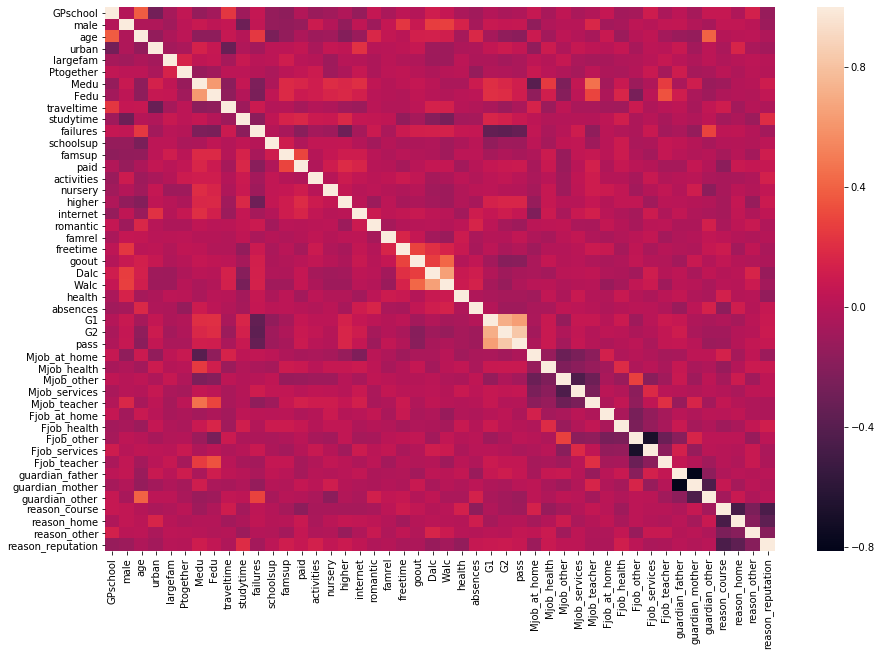

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

In [14]:
df.corr()["pass"].sort_values()

failures            -0.337731
goout               -0.183399
age                 -0.179645
guardian_other      -0.107977
schoolsup           -0.099860
romantic            -0.097737
reason_course       -0.092534
absences            -0.092244
Mjob_other          -0.074163
health              -0.065668
famsup              -0.059219
Dalc                -0.057343
traveltime          -0.044446
Ptogether           -0.044050
largefam            -0.041842
Fjob_services       -0.041572
Mjob_at_home        -0.039031
Fjob_at_home        -0.034839
GPschool            -0.031254
Walc                -0.029957
freetime            -0.018321
nursery             -0.008784
Fjob_health         -0.001962
reason_home         -0.001526
Mjob_teacher         0.001349
guardian_mother      0.009890
activities           0.012414
Fjob_other           0.026180
famrel               0.046683
urban                0.052282
Fjob_teacher         0.052557
reason_other         0.053316
guardian_father      0.059347
Mjob_servi

## 2/ Model Creation

Now that we have a better understanding of our dataset we can create a model that will predict if a student pass or not.
We will try different ways to train our model in order to find the most accurate one.

1. Train a model with all the parameters
2. Train a model without G2
3. Train a model without G1 and G2
4. Compare the accuracy of the three model
5. After these observasions try to find a better model if possible.

In [15]:
# split the trainning data from the test data
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns=['pass'], axis=1, inplace=False)
y = df['pass']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel_beforeT1 = LogisticRegression()
logmodel_beforeT1.fit(X_train,y_train)

/Users/gaetan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
predictions = logmodel_beforeT1.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        50
           1       0.93      0.91      0.92        81

    accuracy                           0.90       131
   macro avg       0.89      0.90      0.90       131
weighted avg       0.90      0.90      0.90       131



In [23]:
from sklearn.metrics import confusion_matrix

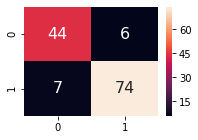

In [24]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, annot_kws={"size": 16})

**Model 1 - Is already at 90% accuracy**

In [25]:
X = df.drop(
    columns=[
        'pass',
        'G2'
    ],
    axis=1,
    inplace=False
)
y = df['pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logmodel_T1 = LogisticRegression()
logmodel_T1.fit(X_train,y_train)
predictions = logmodel_T1.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        50
           1       0.82      0.90      0.86        81

    accuracy                           0.82       131
   macro avg       0.81      0.79      0.80       131
weighted avg       0.82      0.82      0.81       131



/Users/gaetan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
X = df.drop(
    columns=[
        'G1',
        'G2',
        'pass'
    ],
    axis=1,
    inplace=False
)
y = df['pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logmodel_T2 = LogisticRegression()
logmodel_T2.fit(X_train,y_train)
predictions = logmodel_T2.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.34      0.46        50
           1       0.69      0.91      0.79        81

    accuracy                           0.69       131
   macro avg       0.70      0.63      0.62       131
weighted avg       0.70      0.69      0.66       131



/Users/gaetan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Trimester models

We now have a model for three differents points in time:
1. before 1st trimester
2. after 1st trimester
3. after 2nd trimester

## 3/ Create hypothesis

With this new model we will be able to create and test our hypothesis before submiting them to the school.

1. Find 2 to 4 hypothetical actions the school could take. (ex: audio courses for student with a high travel time, which represente 22% of the school)
2. Create for each action a new dataframe as the result of this action (ex: traveltime - 1 if traveltime > 2)
3. Compare the results of each hypothesis after passing it in the model.


### Example hypothesis

1. Motivate students that don't want to go in higher education
2. Give audio ressouces for students with long travel time
3. Reduce absences

## Hypothesis 1 - Travel Time Optimisation

First let's look at the **proportion** of students by travel time to estimate if it will have any **impact**.

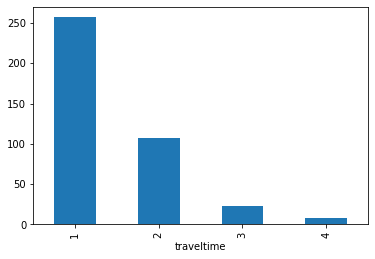

In [27]:
df.groupby('traveltime').count()['pass'].plot(kind="bar")

In [28]:
df.groupby('traveltime').mean()['pass']

traveltime
1    0.688716
2    0.635514
3    0.652174
4    0.625000
Name: pass, dtype: float64

**Half** of the **failing students** could benefit from some travel time optimisation.<br>
Let's **simuluate** the outcome with our models.

In [29]:
traveltime_df = df
traveltime_df["traveltime"] = traveltime_df["traveltime"].apply(lambda x: x - 1 if x > 1 else x)

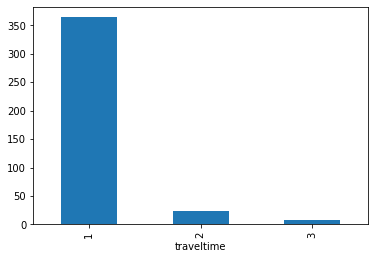

In [30]:
traveltime_df.groupby('traveltime').count()['pass'].plot(kind="bar")

In [31]:
X = traveltime_df.drop(
    columns=[
        'pass'
    ],
    axis=1,
    inplace=False
)
traveltime_predictions = logmodel_beforeT1.predict(X)
[traveltime_predictions.size, traveltime_predictions.sum()]

[395, 260]

In [32]:
X = df.drop(
    columns=[
        'G1',
        'G2',
        'pass'
    ],
    axis=1,
    inplace=False
)
predictions = logmodel_T2.predict(X)
[predictions.size, predictions.sum()]

[395, 318]

For now this **do not change** the outcome for the student at all.<br> Maybe **increasing** the **study time** by one unit will make it more accurate.

In [33]:
traveltime_df['studytime'] = traveltime_df['studytime'].apply(lambda x: x + 1 if x < 4 else x)

In [34]:
X = traveltime_df.drop(
    columns=[
        'G1',
        'G2',
        'pass'
    ],
    axis=1,
    inplace=False
)
traveltime_predictions = logmodel_T2.predict(X)
[traveltime_predictions.size, traveltime_predictions.sum()]


[395, 329]

Looking at the prediction we see a **3% increase** in student passing the exam. <br>
So this option might **not** be **the priority**.

## Hypothesis 2 - Motivation to go to higher education

First let's look at the **proportion** of students who want to go to higher education and estimate if it will have any **impact**.

In [37]:
df.groupby('higher').count()['pass']

higher
0     20
1    375
Name: pass, dtype: int64

A very few **5%** of the student don't want go to higher education.<br>
**32%** of the student are not passing.

This might be interesting to further investigate and maybe even trying to get new data about student carreer plan.

,GPschool,male,age,urban,largefam,Ptogether,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other,reason_course,reason_home,reason_other,reason_reputation
pass,,,,,,,,,,,,,,,,,,,,,
0,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
1,265,265,265,265,265,265,265,265,265,265,...,265,265,265,265,265,265,265,265,265,265


## 4/ Conclusion

You can now report to the school on what you have found and what are the options available to them.